# IoT Stream Zeiss 2022

**Steps overview:**
<br>&emsp; `Step 1: Setup`
<br>&emsp;&emsp; - import libraries that you need for your program
<br>&emsp;&emsp; - create a connection to your database
<br>&emsp; `Step 2: Collection`
<br>&emsp;&emsp; - create a table in your database
<br>&emsp;&emsp; - collect and store data into your database
<br>&emsp; `Step 3: Visualization`
<br>&emsp;&emsp; - access the data in the database
<br>&emsp;&emsp; - create plots of the data
<br>&emsp; `Step 4: Your use-case`
<br>&emsp;&emsp; - set up a table according to your use-case requirements
<br>&emsp;&emsp; - collect data for your use-case and store it in the database
<br>&emsp; `Step 5: Close the connection to the database`
<br>&emsp;&emsp; - after all the work you just have to close the connection to your database

# Step 1: Setup

In [12]:
# import the needed libraries
import psycopg2
import pandas as pd
import time
from datetime import datetime
import random

# Construct connection string for database and connect to it
conn = psycopg2.connect(dbname='postgres', user='nimda@iot-zeiss-2504', host='iot-zeiss-2504.postgres.database.azure.com', password='leadml-2022', port='5432', sslmode='require')
cursor = conn.cursor()
print("Connection established")

Connection established


# Step 2: Collection

**Azure:** Azure is the cloud service from Microsoft. A similar cloud service is AWS from Amazon.
<br>
**Azure Database:** We use a relational Database on Azure (PostgreSQL - Single Server) to store the collected data. A relational database is a collection of data items with pre-defined relationships between them. These items are organized as a set of tables with columns and rows. Tables are used to hold information about the objects to be represented in the database.
<br>
**SQL:** SQL is a standard language for storing, manipulating and retrieving data in databases. We will use it to communicate with our database.
<br>The SQL commands can be executed with "cursor.execute(  `SQL command`  )".

### Drop previous table of same name (here: 'inventory') if one exists

In [13]:
cursor.execute("DROP TABLE IF EXISTS inventory;")
print("Finished dropping table (if existed)")

Finished dropping table (if existed)


### Create a table (with name "inventory")

**columns of the table:**
<br>&emsp;    `id` is our primary key and will be increased automatically (natural number, first datapoint has id=0)
<br>&emsp;    `air_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `sound_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `temperature_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `date` is the date of the creation of the datapoint (form: 'year-month-day')
<br>&emsp;    `time` is the time of creation of the datapoint (form: '00:00:00')

In [4]:
cursor.execute("CREATE TABLE inventory (id serial PRIMARY KEY, air_sensor FLOAT8, sound_sensor FLOAT8, temperature_sensor FLOAT8, date DATE, time TIME);")
print("Finished creating table")

Finished creating table


### Collect and insert data into the table

In [5]:
# function to collect the data from the sensors
def collect_data():
    air_sensor = random.randint(0,100)
    sound_sensor = random.randint(0,100)
    temperature_sensor = random.randint(0,100)
    
    return air_sensor, sound_sensor, temperature_sensor

In [6]:
start = time.time()
end = time.time()

while end-start<10: # collect data for 10 sec
    
    # output the passed time
    print("passed time: ", end-start)
    end = time.time()
    
    # call the 'collect_data' function
    air_sensor, sound_sensor, temperature_sensor = collect_data()
    date = datetime.today().strftime("%Y-%m-%d")
    time = datetime.today().strftime("%H:%M:%S")
    
    # insert data into the database (here: "inventory")
    cursor.execute("INSERT INTO inventory (air_sensor, sound_sensor, temperature_sensor, date, time) VALUES (%s, %s, %s, %s, %s);", (air_sensor, sound_sensor, temperature_sensor, date, time))

passed time:  5.1975250244140625e-05
passed time:  0.0006110668182373047
passed time:  0.09905695915222168
passed time:  0.1357710361480713
passed time:  0.17162704467773438
passed time:  0.20503711700439453
passed time:  0.23970603942871094
passed time:  0.2739741802215576
passed time:  0.30630993843078613
passed time:  0.3441622257232666
passed time:  0.37871503829956055
passed time:  0.4138340950012207
passed time:  0.4507410526275635
passed time:  0.48635196685791016
passed time:  0.5211400985717773
passed time:  0.5565152168273926
passed time:  0.5927670001983643
passed time:  0.6280031204223633
passed time:  0.6641709804534912
passed time:  0.6997570991516113
passed time:  0.7361900806427002
passed time:  0.772590160369873
passed time:  0.8085918426513672
passed time:  0.8437490463256836
passed time:  0.879127025604248
passed time:  0.9124660491943359
passed time:  0.9479150772094727
passed time:  0.9798870086669922
passed time:  1.0156099796295166
passed time:  1.051412105560302

passed time:  9.373085021972656
passed time:  9.4083731174469
passed time:  9.444427013397217
passed time:  9.480383157730103
passed time:  9.516156911849976
passed time:  9.552298069000244
passed time:  9.587502241134644
passed time:  9.621838092803955
passed time:  9.656932830810547
passed time:  9.691007137298584
passed time:  9.725124835968018
passed time:  9.761672973632812
passed time:  9.7955961227417
passed time:  9.830989122390747
passed time:  9.86770510673523
passed time:  9.899518966674805
passed time:  9.933182001113892
passed time:  9.969379186630249


# Step 3: Visualization

### Read data from database

In [7]:
# Fetch all rows from table (here 'inventory')
cursor.execute("SELECT air_sensor, sound_sensor, temperature_sensor, date, time FROM inventory;")
rows = cursor.fetchall()
    
# Create DataFrame with rows
df = pd.DataFrame(rows, columns=["air_sensor", "sound_sensor", "temperature_sensor", "date", "time"])

# show the first 10 rows of it
df.head(10)

,air_sensor,sound_sensor,temperature_sensor,date,time
0,96.0,78.0,1.0,2022-05-02,08:55:34
1,53.0,65.0,50.0,2022-05-02,08:55:34
2,20.0,90.0,20.0,2022-05-02,08:55:34
3,56.0,9.0,6.0,2022-05-02,08:55:34
4,25.0,82.0,18.0,2022-05-02,08:55:34
5,63.0,74.0,65.0,2022-05-02,08:55:34
6,18.0,84.0,19.0,2022-05-02,08:55:34
7,33.0,4.0,78.0,2022-05-02,08:55:34
8,68.0,66.0,25.0,2022-05-02,08:55:34
9,45.0,62.0,78.0,2022-05-02,08:55:34


### Plot data 

<AxesSubplot:>

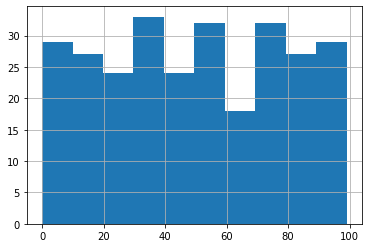

In [10]:
# create a histogram of the column 'air_sensor'
df["air_sensor"].hist()

# Step 4: Your use-case

You have completed the tutorial and you are now ready to go up and adjust the code according to your use-case. Good Luck :-)

# Step 5: Close the connection to the database

In [11]:
conn.commit()
cursor.close()
conn.close()
print("connection closed")

connection closed
